
## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">Osman Öztürk</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to my "**AutoScout Data Analysis Project ". Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.


**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.


# PART- 1 `( Data Cleaning )`

In [284]:
# pip install skimpy --user

In [285]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from skimpy import clean_columns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [286]:
df = pd.read_json('scout_car.json', lines=True)

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [288]:
df.head(3).T

,0,1,2
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,"56,013 km","80,000 km","83,450 km"
registration,01/2016,03/2017,02/2016
prev_owner,2 previous owners,None,1 previous owner
kW,NaN,NaN,NaN


In [289]:
df.describe()

,price,kW
count,15919.00,0.00
mean,18019.90,NaN
std,7386.17,NaN
min,13.00,NaN
25%,12850.00,NaN
50%,16900.00,NaN
75%,21900.00,NaN
max,74600.00,NaN


In [290]:
df.describe(include=[object]).T

,count,unique,top,freq
url,15919,15919,https://www.autoscout24.com//offers/audi-a1-sp...,1
make_model,15919,9,Audi A3,3097
short_description,15873,10001,SPB 1.6 TDI 116 CV S tronic Sport,64
body_type,15859,9,Sedans,7903
vat,11406,2,VAT deductible,10980
km,15919,6690,10 km,1045
registration,15919,48,-/-,1597
prev_owner,9091,4,1 previous owner,8294
hp,15919,81,85 kW,2542
Type,15917,169,"[, Used, , Diesel (Particulate Filter)]",3475


In [291]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

### Rename the Column Names

In [292]:
# First Method

# from skimpy import clean_columns

# df = clean_columns(df)
# df.head(3).T

In [293]:
# Second Method

df["Comfort_Convenience"] = df["\nComfort & Convenience\n"]
df["Entertainment_Media"] = df["\nEntertainment & Media\n"]
df["Extras"] = df["\nExtras\n"]
df["Safety_Security"] = df["\nSafety & Security\n"]

drop_columns = ["\nComfort & Convenience\n", "\nEntertainment & Media\n", "\nExtras\n", "\nSafety & Security\n"]

df.drop(drop_columns, axis=1, inplace=True)

df.head(3).T

,0,1,2
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,"56,013 km","80,000 km","83,450 km"
registration,01/2016,03/2017,02/2016
prev_owner,2 previous owners,None,1 previous owner
kW,NaN,NaN,NaN


In [294]:
#Third Method

# df.rename(columns={"\nComfort & Convenience\n": "Comfort_Convenience",
#                    "\nEntertainment & Media\n":"Entertainment_Media",
#                    "\nExtras\n":"Extras",
#                    "\nSafety & Security\n":"Safety_Security"}, inplace=True)

# df.head(3).T

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [296]:
df.shape # we have 54 columns at the beginning

(15919, 54)

In [297]:
is_null = pd.DataFrame(df.isnull().sum(), columns = ['isnull'])
is_null # how many null do we have in the columns?

,isnull
url,0
make_model,0
short_description,46
body_type,60
price,0
vat,4513
km,0
registration,0
prev_owner,6828
kW,15919


In [298]:
percentage_null = pd.DataFrame(df.isnull().sum()/df.shape[0]*100, columns = ['percentage_null'])
percentage_null # null percentage of the columns

,percentage_null
url,0.00
make_model,0.00
short_description,0.29
body_type,0.38
price,0.00
vat,28.35
km,0.00
registration,0.00
prev_owner,42.89
kW,100.00


In [299]:
summary_null = pd.concat([is_null, percentage_null], axis = 1).reset_index().rename({'index':'Columns'},axis = 1)
summary_null

,Columns,isnull,percentage_null
0,url,0,0.00
1,make_model,0,0.00
2,short_description,46,0.29
3,body_type,60,0.38
4,price,0,0.00
5,vat,4513,28.35
6,km,0,0.00
7,registration,0,0.00
8,prev_owner,6828,42.89
9,kW,15919,100.00


### Dropping columns which have missing values more than %80

In [300]:

def df_nans(df, limit): # gives us the columns which has null more than limit value
    missing = df.isnull().sum()*100 / df.shape[0]
    return missing.loc[lambda x : x >= limit]

def column_nans(serial):
    # display percentage of nans in a Series
    return serial.isnull().sum()*100 / serial.shape[0]

In [301]:
df_nans(df, 80)

kW                              100.00
Electricity consumption          99.14
Last Service Date                96.44
Other Fuel Types                 94.47
Availability                     96.01
Last Timing Belt Service Date    99.90
Available from                   98.29
dtype: float64

In [302]:
column_nans(df["Electricity consumption"])

99.13939317796344

In [303]:
df_nans(df, 80).index

Index(['kW', 'Electricity consumption', 'Last Service Date',
       'Other Fuel Types', 'Availability', 'Last Timing Belt Service Date',
       'Available from'],
      dtype='object')

In [304]:
df_nans(df, 80).values

array([100.        ,  99.13939318,  96.44450028,  94.47201457,
        96.01105597,  99.89949117,  98.29134996])

In [305]:
drop_columns = df_nans(df, 80).index
drop_columns

# the columns which has null values more than %80 are deleted

Index(['kW', 'Electricity consumption', 'Last Service Date',
       'Other Fuel Types', 'Availability', 'Last Timing Belt Service Date',
       'Available from'],
      dtype='object')

In [306]:
df.drop(drop_columns, axis=1, inplace=True)

In [307]:
df["null"].value_counts()

[]    15919
Name: null, dtype: int64

In [308]:
df.drop("null", axis=1, inplace=True)

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   url                  15919 non-null  object
 1   make_model           15919 non-null  object
 2   short_description    15873 non-null  object
 3   body_type            15859 non-null  object
 4   price                15919 non-null  int64 
 5   vat                  11406 non-null  object
 6   km                   15919 non-null  object
 7   registration         15919 non-null  object
 8   prev_owner           9091 non-null   object
 9   hp                   15919 non-null  object
 10  Type                 15917 non-null  object
 11  Previous Owners      9279 non-null   object
 12  Next Inspection      3535 non-null   object
 13  Inspection new       3932 non-null   object
 14  Warranty             10499 non-null  object
 15  Full Service         8215 non-null   object
 16  Non-

# The Examination of Columns 

## url

In [310]:
df.url.value_counts(dropna=False)

https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e                  1
https://www.autoscout24.com//offers/opel-insignia-bus-inno-2-0-cdti-aut-navi-bi-xe-led-e6-diesel-black-8710b253-dd98-4ed0-9d46-cbad2d79532b                1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-10b7463b-9f56-4348-af35-df3432b2b585    1
https://www.autoscout24.com//offers/opel-insignia-2-0cdti-st-business-innovation-navi-bt-diesel-black-ba5a3368-dedc-4e51-9127-3976b26e93c2                 1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-7b52f054-78d3-4d5e-9370-8a7d081d7edd    1
                                                                                                                                                          ..
https://www.autoscout24.com//offers/audi-a3-sb-30-1-6-tdi-

In [311]:
# Even if url contains some information, we do NOT need it since this information can be obtained from other features.

df.drop("url", axis=1, inplace=True)

In [312]:
df.shape

(15919, 45)

## make_model

In [313]:
df.make_model.value_counts(dropna=False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

**As seen, the "make_model" column gives us a more detailed information for our analysis so after the examination of the following columns, "Make" & "Model", we will decide which one/s we will continue.**

## Make

In [314]:
df.Make.value_counts(dropna=False)

\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: Make, dtype: int64

In [315]:
df["Make"] = df.Make.str.strip('\n')

# df['Make'].map(lambda x : x.strip('\n '), na_action = 'ignore')

In [316]:
df.Make.value_counts(dropna=False)

Opel       7343
Audi       5712
Renault    2864
Name: Make, dtype: int64

## Model

In [317]:
df.Model.value_counts(dropna=False)

[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: Model, dtype: int64

In [318]:
df["Model"][0]

['\n', 'A1', '\n']

In [319]:
df["Model"][0][1]

'A1'

In [320]:
df["Model"].apply(lambda x: x[1])

# df['Model'].map(lambda x : x[1], na_action = 'ignore')

0            A1
1            A1
2            A1
3            A1
4            A1
          ...  
15914    Espace
15915    Espace
15916    Espace
15917    Espace
15918    Espace
Name: Model, Length: 15919, dtype: object

In [321]:
df.Model.str[1] # method 2

0            A1
1            A1
2            A1
3            A1
4            A1
          ...  
15914    Espace
15915    Espace
15916    Espace
15917    Espace
15918    Espace
Name: Model, Length: 15919, dtype: object

In [322]:
df["Model"] = df.Model.str[1]

In [323]:
df.Model.value_counts(dropna=False)

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: Model, dtype: int64

In [324]:
df[['make_model', 'Make', 'Model']].sample(20)

,make_model,Make,Model
1877,Audi A1,Audi,A1
7666,Opel Astra,Opel,Astra
10502,Opel Insignia,Opel,Insignia
10730,Opel Insignia,Opel,Insignia
10228,Opel Corsa,Opel,Corsa
7012,Opel Astra,Opel,Astra
9470,Opel Corsa,Opel,Corsa
8963,Opel Corsa,Opel,Corsa
7486,Opel Astra,Opel,Astra
8219,Opel Astra,Opel,Astra


In [325]:
df.drop(["Make", "Model"], axis=1, inplace=True)

In [326]:
df.shape

(15919, 43)

**After the examination, we have decided to drop the columns, "Make" & "Model" and kept the column of "make_model.**

## short_description

In [327]:
df.short_description.value_counts(dropna=False)

SPB 1.6 TDI 116 CV S tronic Sport                 64
None                                              46
1.4 66kW (90CV) Selective                         40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH             38
SPB 30 TDI S tronic Business                      35
                                                  ..
K Sports Tourer Business **Navi*Voll**             1
1.0 Turbo ecoFLEX Automatic Elective Park Navi     1
1.6 CDTI Business *Navi*Automatik*Spurh.*          1
1.6 136 CV Automatica Navi E 6 Garanzia Full       1
TCe 225 EDC GPF LIM Deluxe Pano,RFK                1
Name: short_description, Length: 10002, dtype: int64

In [328]:
df['short_description'].nunique()

10001

In [329]:
df.drop("short_description", axis=1, inplace=True)

In [330]:
df.shape

(15919, 42)

## description 

In [331]:
df['description'].astype('str').value_counts(dropna=False)

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [332]:
df['description'].astype('str').nunique()

12874

In [337]:
df.drop("description", axis=1, inplace=True)

KeyError: "['description'] not found in axis"

In [339]:
df.shape

(15919, 41)

**Even if the columns of "short_description" & "description" contain detailed information, we do NOT need it since this information can be obtained from other features.**

## body_type

In [340]:
df.body_type.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
None               60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

## Body 

In [341]:
df.Body.astype('str').value_counts(dropna=False)

['\n', 'Sedans', '\n']           7903
['\n', 'Station wagon', '\n']    3553
['\n', 'Compact', '\n']          3153
['\n', 'Van', '\n']               783
['\n', 'Other', '\n']             290
['\n', 'Transporter', '\n']        88
nan                                60
['\n', 'Off-Road', '\n']           56
['\n', 'Coupe', '\n']              25
['\n', 'Convertible', '\n']         8
Name: Body, dtype: int64

In [342]:
df["Body"] = df.Body.str[1]

In [343]:
df.Body.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: Body, dtype: int64

In [344]:
df[['body_type', 'Body']].sample(20)

,body_type,Body
12722,Station wagon,Station wagon
10564,Sedans,Sedans
15530,Van,Van
15554,Van,Van
12407,Station wagon,Station wagon
9908,Compact,Compact
8502,Compact,Compact
10091,Compact,Compact
11502,Station wagon,Station wagon
10224,Compact,Compact


In [345]:
df.drop("Body", axis = 1, inplace = True)

In [346]:
df.shape

(15919, 40)

**Both the columns of "body_type" & "Body" have the same information, we will keep the "body_type" column which is more readable.**

## price (target column)

In [347]:
df.price.value_counts(dropna=False)

14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64

In [348]:
df.price.isnull().sum()

0

In [349]:
df["price"].describe()

count   15919.00
mean    18019.90
std      7386.17
min        13.00
25%     12850.00
50%     16900.00
75%     21900.00
max     74600.00
Name: price, dtype: float64

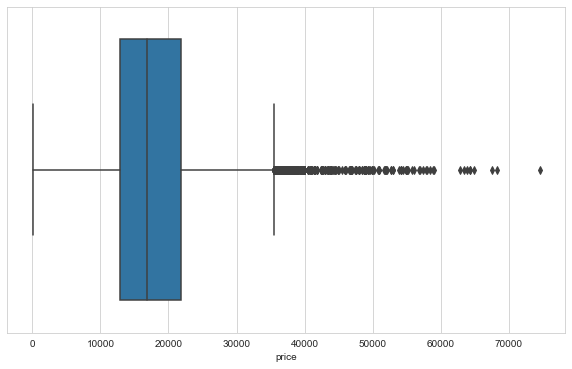

In [350]:
sns.boxplot(df.price);

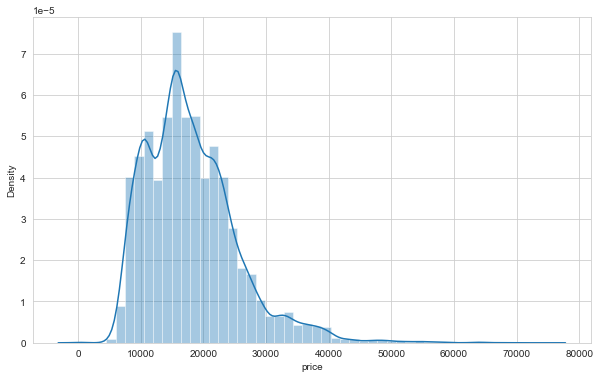

In [351]:
sns.distplot(df.price);

## vat
The **``"Value Added Tax"``** (VAT) in the European Union is a general, broadly based consumption tax assessed on the value added to goods and services.

In [352]:
df.vat.value_counts(dropna=False)

VAT deductible      10980
None                 4513
Price negotiable      426
Name: vat, dtype: int64

## km

In [353]:
df.km.value_counts(dropna=False)

10 km        1045
- km         1024
1 km          367
5 km          170
50 km         148
             ... 
67,469 km       1
43,197 km       1
10,027 km       1
35,882 km       1
57 km           1
Name: km, Length: 6690, dtype: int64

In [354]:
df["km"] = df.km.str.replace(',', '').str.extract('(\d{1,8})').astype('float')  
                                   # .str.extract('(\d+)')

In [355]:
# This is another solution

#df["km"] = df.km.str.replace(',', '').str.rstrip(" km").replace('-', np.nan).astype('float')

In [356]:
df.km.value_counts(dropna=False)

10.00       1045
NaN         1024
1.00         367
5.00         170
50.00        148
            ... 
67469.00       1
43197.00       1
10027.00       1
35882.00       1
57.00          1
Name: km, Length: 6690, dtype: int64

## registration & First Registration

In [357]:
df.registration.value_counts(dropna=False)

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2018     141
09/2016     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
08/2019       1
11/2019       1
12/2019       1
Name: registration, dtype: int64

In [358]:
# df.registration.str.split('/').str[1]
# df.registration.str.extract("(\d{2}).(\d{4})")
# df.registration.str.extract("(\d{4})")

In [359]:
df["First Registration"].astype('str').value_counts(dropna=False)

['\n', '2018', '\n']    4522
['\n', '2016', '\n']    3674
['\n', '2017', '\n']    3273
['\n', '2019', '\n']    2853
nan                     1597
Name: First Registration, dtype: int64

**We prefer "First Registration" column because I don't need month values.**

In [360]:
df['First Registration'].astype(str).str.contains(r"(\d{4})")

0         True
1         True
2         True
3         True
4         True
         ...  
15914    False
15915     True
15916     True
15917     True
15918     True
Name: First Registration, Length: 15919, dtype: bool

In [361]:
# df['First Registration'].astype(str).str.findall("(\w{4})").str.join("")
# df['First Registration'].astype(str).str.extract("(\w{4})")
# df['First Registration'].str.get(1)
df['First Registration'].str[1]

0        2016
1        2017
2        2016
3        2016
4        2016
         ... 
15914     NaN
15915    2019
15916    2019
15917    2019
15918    2019
Name: First Registration, Length: 15919, dtype: object

In [362]:
df['First Registration'] = df['First Registration'].str[1].astype('float')

In [363]:
df["First Registration"].value_counts(dropna=False)

2018.00    4522
2016.00    3674
2017.00    3273
2019.00    2853
NaN        1597
Name: First Registration, dtype: int64

In [364]:
df[['registration', 'First Registration']].sample(20)

,registration,First Registration
11713,04/2017,2017.00
3063,06/2016,2016.00
8777,02/2016,2016.00
4669,-/-,NaN
8309,04/2018,2018.00
3131,03/2016,2016.00
1002,07/2018,2018.00
14220,04/2018,2018.00
4938,06/2018,2018.00
3966,05/2017,2017.00


In [366]:
# The data used for this project were scraped in 2019.

df['age'] = 2019 - df['First Registration']

In [367]:
df.age.value_counts(dropna=False)

1.00    4522
3.00    3674
2.00    3273
0.00    2853
NaN     1597
Name: age, dtype: int64

In [368]:
df.drop(["registration", "First Registration"], axis=1, inplace=True)

In [370]:
df.shape

(15919, 39)

## prev_owner & Previous Owners

In [371]:
df.prev_owner.value_counts(dropna=False)

1 previous owner     8294
None                 6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [372]:
df["Previous Owners"].value_counts(dropna=False)

\n1\n                                                                                        8101
NaN                                                                                          6640
\n2\n                                                                                         766
\n0\n                                                                                         163
\n3\n                                                                                          17
                                                                                             ... 
[\n1\n, \n111 g CO2/km (comb)\n]                                                                1
[\n1\n, \nEuro 6\n]                                                                             1
[\n2\n, \n119 g CO2/km (comb)\n]                                                                1
[\n1\n, \n, 6.6 l/100 km (comb), \n, 8.1 l/100 km (city), \n, 5.7 l/100 km (country), \n]       1
[\n2\n, \n137 g CO2/

I prefer "Previous Owners" column because it has less NaN values. But before dropping "prev_owner", I'll fill "Previous Owners" with "prev_owner".

In [373]:
[item[0] if type(item) == list else item for item in df["Previous Owners"]]

['\n2\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n2\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n0\n',
 '\n2\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n2\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n2\n',
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n2\n',
 '\n1\n',
 nan,
 nan,
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 '\n1\n',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '\n1\n',
 nan,
 nan

In [374]:
# With list comprehension

df["Previous_Owners"] = [item[0] if type(item) == list else item for item in df["Previous Owners"]]
df["Previous_Owners"]

0        \n2\n
1          NaN
2        \n1\n
3        \n1\n
4        \n1\n
         ...  
15914      NaN
15915    \n1\n
15916    \n1\n
15917      NaN
15918    \n1\n
Name: Previous_Owners, Length: 15919, dtype: object

In [375]:
# With apply() function

df["Previous_Owners2"] = df["Previous Owners"].apply(lambda item: item[0] if type(item) == list else item)
df["Previous_Owners2"]

0        \n2\n
1          NaN
2        \n1\n
3        \n1\n
4        \n1\n
         ...  
15914      NaN
15915    \n1\n
15916    \n1\n
15917      NaN
15918    \n1\n
Name: Previous_Owners2, Length: 15919, dtype: object

In [376]:
df["Previous_Owners"] = df["Previous_Owners"].str.strip("\n").astype('float')

In [377]:
df["Previous_Owners"].value_counts(dropna=False)

1.00    8294
NaN     6640
2.00     778
0.00     188
3.00      17
4.00       2
Name: Previous_Owners, dtype: int64

In [378]:
df["prev_owner"] = df["prev_owner"].str.extract("(\d*)").astype('float')

In [379]:
#Alternative method

#df["prev_owner"] = df["prev_owner"].str.split(" ").str[0].astype('float')

In [380]:
df["prev_owner"].value_counts(dropna=False)

1.00    8294
NaN     6828
2.00     778
3.00      17
4.00       2
Name: prev_owner, dtype: int64

In [381]:
df[(df["Previous_Owners"].isna()) & (df["prev_owner"].notna())]#.value_counts()

,make_model,body_type,price,vat,km,prev_owner,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,Offer Number,Body Color,Paint Type,Body Color Original,Upholstery,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Emission Label,Gears,Country version,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,Previous_Owners2


In [382]:
df["Previous_Owners"].fillna(df["prev_owner"], inplace=True)

In [383]:
df["Previous_Owners"].value_counts(dropna=False)

1.00    8294
NaN     6640
2.00     778
0.00     188
3.00      17
4.00       2
Name: Previous_Owners, dtype: int64

In [384]:
df[(df["Previous_Owners"].isna()) & (df["prev_owner"].notna())]#.value_counts()

,make_model,body_type,price,vat,km,prev_owner,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,Offer Number,Body Color,Paint Type,Body Color Original,Upholstery,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Emission Label,Gears,Country version,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,Previous_Owners2


In [385]:
df.drop(["prev_owner", "Previous Owners", "Previous_Owners2"], axis=1, inplace=True)

In [386]:
df.shape

(15919, 38)

## hp 

In [387]:
df.hp.value_counts(dropna=False)

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
70 kW      888
125 kW     707
51 kW      695
55 kW      569
118 kW     516
92 kW      466
121 kW     392
147 kW     380
77 kW      345
56 kW      286
54 kW      276
103 kW     253
87 kW      232
165 kW     194
88 kW      177
60 kW      160
162 kW      98
- kW        88
74 kW       81
96 kW       72
71 kW       59
101 kW      47
67 kW       40
154 kW      39
122 kW      35
119 kW      30
164 kW      27
135 kW      24
82 kW       22
52 kW       22
78 kW       20
1 kW        20
294 kW      18
146 kW      18
141 kW      16
57 kW       10
104 kW       8
120 kW       8
191 kW       7
112 kW       7
155 kW       6
117 kW       6
184 kW       5
90 kW        4
76 kW        4
65 kW        4
149 kW       3
80 kW        3
168 kW       3
98 kW        3
93 kW        3
228 kW       2
270 kW       2
53 kW        2
140 kW       2
86 kW        2
167 kW       2
127 kW       2
89 kW        2
143 kW       2
63 kW        2
40 kW     

In [388]:
df["hp_kW"] = df.hp.str.extract('(\d{1,4})').astype('float') # str.extract('(\d+)')

# df['hp_kW'] = df['hp'].str.strip(' kW').replace('-', np.nan).astype(float)

In [389]:
#Alternative method

#df.replace({"hp" : {" kW" : ""}}, regex = True, inplace = True)
#df["hp_kw"] = pd.to_numeric(df.hp)

In [390]:
df.hp_kW.value_counts(dropna=False)

85.00     2542
66.00     2122
81.00     1402
100.00    1308
110.00    1112
70.00      888
125.00     707
51.00      695
55.00      569
118.00     516
92.00      466
121.00     392
147.00     380
77.00      345
56.00      286
54.00      276
103.00     253
87.00      232
165.00     194
88.00      177
60.00      160
162.00      98
NaN         88
74.00       81
96.00       72
71.00       59
101.00      47
67.00       40
154.00      39
122.00      35
119.00      30
164.00      27
135.00      24
82.00       22
52.00       22
78.00       20
1.00        20
294.00      18
146.00      18
141.00      16
57.00       10
104.00       8
120.00       8
191.00       7
112.00       7
155.00       6
117.00       6
184.00       5
90.00        4
76.00        4
65.00        4
149.00       3
80.00        3
168.00       3
98.00        3
93.00        3
228.00       2
270.00       2
53.00        2
140.00       2
86.00        2
167.00       2
127.00       2
89.00        2
143.00       2
63.00        2
40.00     

In [391]:
df.drop('hp', axis=1, inplace=True)

In [392]:
df.shape

(15919, 38)

## Type

In [393]:
df.Type.astype('str').value_counts()

['', 'Used', '', 'Diesel (Particulate Filter)']                                                                                 3475
['', 'Used', '', 'Diesel']                                                                                                      2516
['', 'Used', '', 'Gasoline']                                                                                                    2367
['', 'Used', '', 'Super 95']                                                                                                    1818
['', 'Pre-registered', '', 'Super 95']                                                                                           500
                                                                                                                                ... 
['', 'New', '', 'Regular/Benzine 91 / Super 95 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 98 / Super E10 95']       1
['', 'Used', '', 'Super 95 / Super Plus 98 / Super E10 95 / Super Plu

In [394]:
df["Type"] = df.Type.str[1]

# df['Type'].map(lambda x : x[1], na_action = 'ignore')

In [395]:
df['Type'].value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: Type, dtype: int64

## Next Inspection & Inspection new

In [396]:
df["Next Inspection"].astype('str').value_counts(dropna=False)

nan                                           12384
\n04/2022\n                                      62
\n03/2021\n                                      38
\n03/2022\n                                      36
\n06/2021\n                                      34
                                              ...  
['\n12/2018\n', '\n97 g CO2/km (comb)\n']         1
['\n03/2022\n', '\n1 (No sticker)\n']             1
['\n05/2021\n', '\n93 g CO2/km (comb)\n']         1
['\n06/2021\n', '\n93 g CO2/km (comb)\n']         1
['\n01/2022\n', '\n168 g CO2/km (comb)\n']        1
Name: Next Inspection, Length: 1400, dtype: int64

In [397]:
df["Inspection new"].astype('str').value_counts(dropna=False)

nan                                                                                                            11987
['\nYes\n', '\nEuro 6\n']                                                                                        523
\nYes\n                                                                                                          362
['\nYes\n', '\n102 g CO2/km (comb)\n']                                                                           174
['\nYes\n', '\n4 (Green)\n']                                                                                     166
                                                                                                               ...  
['\nYes\n', '\n', '6 l/100 km (comb)', '\n', '8 l/100 km (city)', '\n', '4.9 l/100 km (country)', '\n']            1
['\nYes\n', '\n', '6.8 l/100 km (comb)', '\n', '8.5 l/100 km (city)', '\n', '6.1 l/100 km (country)', '\n']        1
['\nYes\n', '\n', '4.1 l/100 km (comb)', '\n', '7.5 l/100 km (ci

In [398]:
df["Inspection_new"] = [item[0] if type(item) == list else item for item in df["Inspection new"]]

df["Inspection_new"] = df["Inspection_new"].str.strip("\n")

In [399]:
df["Inspection_new"].value_counts(dropna=False)

NaN    11987
Yes     3932
Name: Inspection_new, dtype: int64

In [400]:
df.drop(["Next Inspection", "Inspection new"], axis=1, inplace=True)

In [401]:
df.shape

(15919, 37)

## Warranty

In [402]:
df.Warranty.astype('str').value_counts(dropna=False)

nan                                                                                                                5420
['\n', '\n', '\nEuro 6\n']                                                                                         1868
\n12 months\n                                                                                                      1177
\n                                                                                                                  979
\n24 months\n                                                                                                       566
                                                                                                                   ... 
['\n72 months\n', '\n125 g CO2/km (comb)\n']                                                                          1
['\n60 months\n', '\n14 g CO2/km (comb)\n']                                                                           1
['\n24 months\n', '\n121 g CO2/km (comb)

In [403]:
df["Warranty"] = df.Warranty.apply(lambda x : x[0] if type(x)==list else x)

In [404]:
df["Warranty"] = df.Warranty.str.strip("\n").str.extract('(\d{1,2})').astype("float") # str.extract('(\d+)')

In [405]:
df.Warranty.value_counts(dropna=False)

NaN      11066
12.00     2594
24.00     1118
60.00      401
36.00      279
48.00      149
6.00       125
72.00       59
3.00        33
23.00       11
18.00       10
20.00        7
25.00        6
2.00         5
50.00        4
26.00        4
16.00        4
4.00         3
1.00         3
19.00        3
34.00        3
13.00        3
28.00        2
22.00        2
14.00        2
11.00        2
46.00        2
21.00        2
9.00         2
17.00        2
45.00        2
33.00        1
40.00        1
65.00        1
10.00        1
15.00        1
7.00         1
8.00         1
56.00        1
49.00        1
47.00        1
30.00        1
Name: Warranty, dtype: int64

## Full Service 

In [406]:
df['Full Service'].astype('str').value_counts(dropna=False)

nan                                                                                                             7704
['\n', '\n', '\n4 (Green)\n']                                                                                   2235
['\n', '\n', '\nEuro 6\n']                                                                                      2097
['\n', '\n']                                                                                                    1702
['\n', '\n', '\nEuro 6d-TEMP\n']                                                                                 399
                                                                                                                ... 
['\n', '\n', '\n80 g CO2/km (comb)\n']                                                                             1
['\n', '\n', '\n84 g CO2/km (comb)\n']                                                                             1
['\n', '\n', '\n', '6 l/100 km (comb)', '\n', '8 l/100 km (city)

In [407]:
df.drop("Full Service", axis=1, inplace=True)

In [408]:
df.shape

(15919, 36)

## Non-smoking Vehicle

In [409]:
df['Non-smoking Vehicle'].value_counts(dropna=False)

NaN                                                                                           8742
[\n, \n]                                                                                      3647
[\n, \n, \n4 (Green)\n]                                                                       1240
[\n, \n, \nEuro 6\n]                                                                          1127
[\n, \n, \nEuro 6d-TEMP\n]                                                                     345
\n                                                                                              70
[\n, \n, \n120 g CO2/km (comb)\n]                                                               63
[\n, \n, \n85 g CO2/km (comb)\n]                                                                46
[\n, \n, \n104 g CO2/km (comb)\n]                                                               36
[\n, \n, \n107 g CO2/km (comb)\n]                                                               36
[\n, \n, \

In [410]:
df.drop("Non-smoking Vehicle", axis=1, inplace=True)
df.shape

(15919, 35)

## Offer Number

In [411]:
df['Offer Number'].astype('str').value_counts(dropna=False)

nan                                                 3175
['\nLT67679\n']                                       27
['\nUN89904\n']                                       27
['\nXJ38068\n']                                       27
['\nJV03654\n']                                       27
                                                    ... 
['\n160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b\n']       1
['\n6701576\n']                                        1
['\n6701569\n']                                        1
['\n158121\n']                                         1
['\nRe_30000008029\n']                                 1
Name: Offer Number, Length: 11441, dtype: int64

In [412]:
df['Offer Number'] = df['Offer Number'].str[0].str.strip('\n')

In [413]:
df['Offer Number'].value_counts()

LT67679                                     27
AK13780                                     27
TP62881                                     27
TA76392                                     27
XT61649                                     27
                                            ..
160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b     1
6701576                                      1
6701569                                      1
158121                                       1
Re_30000008029                               1
Name: Offer Number, Length: 11440, dtype: int64

In [414]:
df.drop("Offer Number", axis=1, inplace=True)

In [415]:
df.shape

(15919, 34)

## Body Color & Body Color Original

In [416]:
df['Body Color'].astype('str').value_counts(dropna=False)

['\n', 'Black', '\n']     3745
['\n', 'Grey', '\n']      3505
['\n', 'White', '\n']     3406
['\n', 'Silver', '\n']    1647
['\n', 'Blue', '\n']      1431
['\n', 'Red', '\n']        957
nan                        597
['\n', 'Brown', '\n']      289
['\n', 'Green', '\n']      154
['\n', 'Beige', '\n']      108
['\n', 'Yellow', '\n']      51
['\n', 'Violet', '\n']      18
['\n', 'Bronze', '\n']       6
['\n', 'Orange', '\n']       3
['\n', 'Gold', '\n']         2
Name: Body Color, dtype: int64

In [417]:
df['Body Color'] = df['Body Color'].map(lambda x : x[1], na_action = 'ignore')

In [418]:
df['Body Color'].value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body Color, dtype: int64

## Body Color Original

In [419]:
df['Body Color Original'].astype('str').value_counts(dropna=False)

df['Body Color Original'] = df['Body Color Original'].map(lambda x : x[0].strip('\n'), na_action = 'ignore')

df['Body Color Original'].value_counts(dropna=False)

NaN                              3759
Onyx Schwarz                      338
Bianco                            282
Mythosschwarz Metallic            238
Brillantschwarz                   216
                                 ... 
Rouge-Braun (G0Y)                   1
VARI COLRI DISPONIBILI              1
Kokosnussbraun Metallic             1
Farbe frei wählbar                  1
Perlmutt-Weiß Metallic (Weiß)       1
Name: Body Color Original, Length: 1928, dtype: int64

In [420]:
df[df['Body Color Original'].notnull() & df['Body Color'].isnull()][['Body Color Original', 'Body Color']]

,Body Color Original,Body Color
70,gris nano,NaN
122,wählbar,NaN
150,BLEU UTOPIA,NaN
195,BLEU UTOPIA,NaN
198,null,NaN
...,...,...
15382,TEINTE CAISS,NaN
15527,null,NaN
15619,wählbar - ggf gegen Aufpreis,NaN
15785,GNE NOIR ETOILE,NaN


In [421]:
df.drop(["Body Color", "Body Color Original"], axis=1, inplace=True)

df.shape

(15919, 32)

## Paint Type

In [424]:
df['Paint Type'].astype('str').value_counts(dropna=False)

KeyError: 'Paint Type'

In [ ]:
df['Paint_Type'] = df['Paint Type'].str[0].str.strip('\n')

In [ ]:
df['Paint_Type'].value_counts(dropna=False)

In [ ]:
df.drop("Paint Type", axis=1, inplace=True)

In [425]:
df.shape

(15919, 32)

## Upholstery

In [426]:
df['Upholstery'].astype('str').value_counts(dropna=False)

['\nCloth, Black\n']           5821
nan                            3720
['\nPart leather, Black\n']    1121
['\nCloth\n']                  1005
['\nCloth, Grey\n']             891
['\nCloth, Other\n']            639
['\nFull leather, Black\n']     575
['\nBlack\n']                   491
['\nGrey\n']                    273
['\nOther, Other\n']            182
['\nPart leather\n']            140
['\nFull leather\n']            139
['\nFull leather, Brown\n']     116
['\nPart leather, Grey\n']      116
['\nOther, Black\n']            110
['\nFull leather, Other\n']      72
['\nFull leather, Grey\n']       67
['\nPart leather, Other\n']      65
['\nOther\n']                    56
['\nPart leather, Brown\n']      50
['\nalcantara, Black\n']         47
['\nVelour, Black\n']            36
['\nFull leather, Beige\n']      36
['\nCloth, Brown\n']             28
['\nVelour\n']                   16
['\nOther, Grey\n']              15
['\nCloth, Beige\n']             13
['\nBrown\n']               

In [427]:
df["Upholstery"] = [item[0] if type(item) == list else item for item in df.Upholstery]

In [428]:
df["Upholstery"].value_counts(dropna=False)

\nCloth, Black\n           5821
NaN                        3720
\nPart leather, Black\n    1121
\nCloth\n                  1005
\nCloth, Grey\n             891
\nCloth, Other\n            639
\nFull leather, Black\n     575
\nBlack\n                   491
\nGrey\n                    273
\nOther, Other\n            182
\nPart leather\n            140
\nFull leather\n            139
\nFull leather, Brown\n     116
\nPart leather, Grey\n      116
\nOther, Black\n            110
\nFull leather, Other\n      72
\nFull leather, Grey\n       67
\nPart leather, Other\n      65
\nOther\n                    56
\nPart leather, Brown\n      50
\nalcantara, Black\n         47
\nVelour, Black\n            36
\nFull leather, Beige\n      36
\nCloth, Brown\n             28
\nVelour\n                   16
\nOther, Grey\n              15
\nCloth, Beige\n             13
\nBrown\n                    12
\nCloth, Blue\n              12
\nVelour, Grey\n              8
\nCloth, White\n              8
\nalcant

In [429]:
df["Upholstery"] = df.Upholstery.str.strip("\n").str.split(", ")

In [430]:
df["Upholstery"].astype('str').value_counts(dropna=False)

['Cloth', 'Black']           5821
nan                          3720
['Part leather', 'Black']    1121
['Cloth']                    1005
['Cloth', 'Grey']             891
['Cloth', 'Other']            639
['Full leather', 'Black']     575
['Black']                     491
['Grey']                      273
['Other', 'Other']            182
['Part leather']              140
['Full leather']              139
['Full leather', 'Brown']     116
['Part leather', 'Grey']      116
['Other', 'Black']            110
['Full leather', 'Other']      72
['Full leather', 'Grey']       67
['Part leather', 'Other']      65
['Other']                      56
['Part leather', 'Brown']      50
['alcantara', 'Black']         47
['Velour', 'Black']            36
['Full leather', 'Beige']      36
['Cloth', 'Brown']             28
['Velour']                     16
['Other', 'Grey']              15
['Cloth', 'Beige']             13
['Brown']                      12
['Cloth', 'Blue']              12
['Velour', 'Gr

In [431]:
u_type = ["Cloth", 'Part leather', 'Full leather', 'Velour', 'alcantara']

df["Upholstery_type"] = df["Upholstery"].apply(lambda x : x[0] if type(x) == list and x[0] in u_type else np.nan)

In [432]:
df["Upholstery_type"].value_counts(dropna=False)

Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: Upholstery_type, dtype: int64

In [433]:
color = ['Black', 'Grey', 'Brown', 'Beige', 'White', 'Blue', 'Red', 'Yellow', 'Orange']

def color_finder(x):
    if type(x) == list and len(x) == 2:
        return x[1]
    elif type(x) == list and x[0] in color:
        return x[0]
    else:
        return np.nan
    
df['Upholstery_color'] = df.Upholstery.apply(color_finder)

In [434]:
df["Upholstery_color"].value_counts(dropna=False)

Black     8201
NaN       5078
Grey      1376
Other      960
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: Upholstery_color, dtype: int64

In [435]:
df.drop("Upholstery", axis=1, inplace=True)

In [436]:
df.shape

(15919, 33)

## Nr. of Doors

In [437]:
df["Nr. of Doors"].astype('str').value_counts(dropna=False)

['\n5\n']    11575
['\n4\n']     3079
['\n3\n']      832
['\n2\n']      219
nan            212
['\n1\n']        1
['\n7\n']        1
Name: Nr. of Doors, dtype: int64

In [438]:
df['Nr_of_Doors'] = df['Nr. of Doors'].str[0].str.strip('\n').astype('float')

In [439]:
df["Nr_of_Doors"].value_counts(dropna=False)

5.00    11575
4.00     3079
3.00      832
2.00      219
NaN       212
1.00        1
7.00        1
Name: Nr_of_Doors, dtype: int64

In [440]:
df.drop("Nr. of Doors", axis=1, inplace=True)

In [441]:
df.shape

(15919, 33)

In [163]:
df.shape

(15919, 33)

## Nr. of Seats

In [443]:
df["Nr. of Seats"].astype('str').value_counts(dropna=False)

['\n5\n']    13336
['\n4\n']     1125
nan            977
['\n7\n']      362
['\n2\n']      116
['\n6\n']        2
['\n3\n']        1
Name: Nr. of Seats, dtype: int64

In [445]:
df['Nr_of_Seats'] = df['Nr. of Seats'].str[0].str.strip('\n').astype('float')

In [446]:
df["Nr_of_Seats"].value_counts(dropna=False)

5.00    13336
4.00     1125
NaN       977
7.00      362
2.00      116
6.00        2
3.00        1
Name: Nr_of_Seats, dtype: int64

In [447]:
df.drop("Nr. of Seats", axis=1, inplace=True)

In [448]:
df.shape

(15919, 33)

## Model Code

In [449]:
df["Model Code"].astype('str').value_counts(dropna=False)

nan                 10941
['\n0035/BCB\n']      268
['\n0588/BNO\n']      245
['\n0588/BDB\n']      206
['\n0588/BHX\n']      188
                    ...  
['\n0035/AVN\n']        1
['\n0035/BEM\n']        1
['\n0035/BAG\n']        1
['\n0035/BAA\n']        1
['\n3333/BKG\n']        1
Name: Model Code, Length: 233, dtype: int64

In [450]:
df.drop("Model Code", axis=1, inplace=True)

In [451]:
df.shape

(15919, 32)

## Gearing Type

In [452]:
df["Gearing Type"].astype('str').value_counts(dropna=False)

['\n', 'Manual', '\n']            8153
['\n', 'Automatic', '\n']         7297
['\n', 'Semi-automatic', '\n']     469
Name: Gearing Type, dtype: int64

In [453]:
df['Gearing_Type'] = df['Gearing Type'].str[1]

In [454]:
df["Gearing_Type"].value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: Gearing_Type, dtype: int64

In [455]:
df.drop("Gearing Type", axis=1, inplace=True)

In [456]:
df.shape

(15919, 32)

## Displacement

In [458]:
df["Displacement"].astype('str').value_counts(dropna=False)

['\n1,598 cc\n']     4761
['\n999 cc\n']       2438
['\n1,398 cc\n']     1314
['\n1,399 cc\n']      749
['\n1,229 cc\n']      677
['\n1,956 cc\n']      670
['\n1,461 cc\n']      595
['\n1,490 cc\n']      559
nan                   496
['\n1,422 cc\n']      467
['\n1,197 cc\n']      353
['\n898 cc\n']        351
['\n1,395 cc\n']      320
['\n1,968 cc\n']      301
['\n1,149 cc\n']      288
['\n1,618 cc\n']      212
['\n1,798 cc\n']      210
['\n1,498 cc\n']      196
['\n1,600 cc\n']      130
['\n1,248 cc\n']      110
['\n1,997 cc\n']      103
['\n1,364 cc\n']      102
['\n1,400 cc\n']       90
['\n998 cc\n']         72
['\n1,500 cc\n']       50
['\n2,000 cc\n']       46
['\n1,000 cc\n']       40
['\n1 cc\n']           36
['\n1,998 cc\n']       25
['\n2,480 cc\n']       20
['\n1,200 cc\n']       18
['\n1,984 cc\n']       18
['\n1,397 cc\n']       11
['\n899 cc\n']         11
['\n160 cc\n']          6
['\n929 cc\n']          5
['\n1,499 cc\n']        5
['\n997 cc\n']          4
['\n1,596 cc

In [459]:
df["Displacement_cc"] = df.Displacement.str[0].str.strip('\n').str.replace(',', '').str.extract('(\d{1,5})').astype("float")
                                                                                 # .str.extract('(\d+)')

In [460]:
df["Displacement_cc"].value_counts(dropna=False)

1598.00     4761
999.00      2438
1398.00     1314
1399.00      749
1229.00      677
1956.00      670
1461.00      595
1490.00      559
NaN          496
1422.00      467
1197.00      353
898.00       351
1395.00      320
1968.00      301
1149.00      288
1618.00      212
1798.00      210
1498.00      196
1600.00      130
1248.00      110
1997.00      103
1364.00      102
1400.00       90
998.00        72
1500.00       50
2000.00       46
1000.00       40
1.00          36
1998.00       25
2480.00       20
1200.00       18
1984.00       18
1397.00       11
899.00        11
160.00         6
929.00         5
1499.00        5
997.00         4
1596.00        4
139.00         4
900.00         4
1599.00        3
1199.00        3
1396.00        3
1495.00        2
1589.00        2
1300.00        2
2.00           2
995.00         2
1496.00        1
890.00         1
1580.00        1
1995.00        1
1333.00        1
54.00          1
1533.00        1
1100.00        1
1350.00        1
16000.00      

In [461]:
df.drop("Displacement", axis=1, inplace=True)

In [462]:
df.shape

(15919, 32)

## Cylinders

In [463]:
df["Cylinders"].astype('str').value_counts(dropna=False)

['\n4\n']    8105
nan          5680
['\n3\n']    2104
['\n5\n']      22
['\n6\n']       3
['\n8\n']       2
['\n2\n']       2
['\n1\n']       1
Name: Cylinders, dtype: int64

In [464]:
df["Cylinders"] = df.Cylinders.str[0].str.strip('\n').astype("float")

In [465]:
df["Cylinders"].value_counts(dropna=False)

4.00    8105
NaN     5680
3.00    2104
5.00      22
6.00       3
8.00       2
2.00       2
1.00       1
Name: Cylinders, dtype: int64

## Weight

In [466]:
df["Weight"].astype('str').value_counts(dropna=False)

nan                 6974
['\n1,163 kg\n']     574
['\n1,360 kg\n']     356
['\n1,165 kg\n']     301
['\n1,335 kg\n']     242
                    ... 
['\n1,960 kg\n']       1
['\n1,258 kg\n']       1
['\n1,167 kg\n']       1
['\n1,331 kg\n']       1
['\n2,037 kg\n']       1
Name: Weight, Length: 435, dtype: int64

In [467]:
df["Weight_kg"] = df.Weight.str[0].str.strip('\n').str.replace(',', '').str.extract('(\d{1,6})').astype('float') 
                                                                     # .str.extract('(\d+)')

In [468]:
df["Weight_kg"].value_counts(dropna=False)

NaN        6974
1163.00     574
1360.00     356
1165.00     301
1335.00     242
           ... 
1960.00       1
1258.00       1
1167.00       1
1331.00       1
2037.00       1
Name: Weight_kg, Length: 435, dtype: int64

In [469]:
df.drop("Weight", axis=1, inplace=True)

In [470]:
df.shape

(15919, 32)

## Drive chain

In [471]:
df["Drive chain"].astype('str').value_counts(dropna=False)

['\nfront\n']    8886
nan              6858
['\n4WD\n']       171
['\nrear\n']        4
Name: Drive chain, dtype: int64

In [472]:
df['Drive_chain'] = df['Drive chain'].str[0].str.strip('\n')

In [473]:
df["Drive_chain"].value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: Drive_chain, dtype: int64

In [474]:
df.drop("Drive chain", axis=1, inplace=True)

In [475]:
df.shape

(15919, 32)

## Fuel

In [476]:
df["Fuel"].astype('str').value_counts(dropna=False)

['\n', 'Diesel (Particulate Filter)', '\n']                                                                                                       4315
['\n', 'Super 95', '\n']                                                                                                                          3338
['\n', 'Gasoline', '\n']                                                                                                                          3175
['\n', 'Diesel', '\n']                                                                                                                            2984
['\n', 'Super 95 / Regular/Benzine 91', '\n']                                                                                                      424
['\n', 'Regular/Benzine 91', '\n']                                                                                                                 354
['\n', 'Super E10 95', '\n']                                                                  

In [477]:
df["Fuel"] = df.Fuel.str[1].str.split("/").str[0].str.strip()

In [478]:
df["Fuel"].value_counts(dropna=False)

Diesel (Particulate Filter)          4315
Super 95                             4100
Gasoline                             3175
Diesel                               2984
Regular                               503
Super E10 95                          402
Super 95 (Particulate Filter)         268
Gasoline (Particulate Filter)          77
CNG                                    33
LPG                                    16
Super Plus 98                          11
Liquid petroleum gas (LPG)             10
Super E10 95 (Particulate Filter)       7
Electric                                5
Others                                  5
CNG (Particulate Filter)                3
Super Plus E10 98                       2
Others (Particulate Filter)             1
Biogas                                  1
Domestic gas H                          1
Name: Fuel, dtype: int64

In [479]:
df["Fuel"] = df.Fuel.str.split("(").str[0].str.strip()

In [199]:
df["Fuel"].value_counts(dropna=False)

Diesel                  7299
Super 95                4368
Gasoline                3252
Regular                  503
Super E10 95             409
CNG                       36
LPG                       16
Super Plus 98             11
Liquid petroleum gas      10
Others                     6
Electric                   5
Super Plus E10 98          2
Biogas                     1
Domestic gas H             1
Name: Fuel, dtype: int64

In [200]:
# benzine = ["Gasoline", "Super", "Regular", "Others"]
# diesel = ["Biodiesel", "Diesel"]
# lpg = ["CNG", "Biogas", "Domestic gas H", "LPG", "Liquid"]
# hybrit = ["Electric", "Electric/Gasoline"]


# def fueltype(x):
#     if any(i in x for i in hybrit):
#         return "Hybrit"
#     elif any(i in x for i in lpg):
#         return "LPG/CNG"
#     elif any(i in x for i in benzine):
#         return "Benzine" 
#     elif any(i in x for i in diesel):
#         return "Diesel"          
#     else:
#         return x

# df["Fuel"] = df.Fuel.apply(fueltype)

In [480]:
benzine = ["Gasoline", "Super 95", "Regular", "Super E10 95", "Super Plus 98", "Super Plus E10 98", "Others"]
lpg = ["LPG", "Liquid petroleum gas", "CNG", "Biogas", "Domestic gas H"]

def fueltype(x):
    if x in benzine:
        return "Benzine"
    elif x in lpg:
        return "LPG/CNG"
    else:
        return x

df["Fuel"] = df.Fuel.apply(fueltype)

In [481]:
df.Fuel.value_counts(dropna=False)

Benzine     8551
Diesel      7299
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64

In [482]:
df[df.Fuel == "Electric"][["make_model", "body_type", "CO2 Emission", "Gears", "hp_kW", "Consumption", "price"]]

,make_model,body_type,CO2 Emission,Gears,hp_kW,Consumption,price
3356,Audi A3,Compact,NaN,[\n6\n],150.00,NaN,24950
3612,Audi A3,Sedans,[\n36 g CO2/km (comb)\n],[\n6\n],110.00,"[\n, 1.6 l/100 km (comb), \n, \n, \n]",38450
3615,Audi A3,Sedans,[\n36 g CO2/km (comb)\n],[\n6\n],110.00,"[\n, 1.6 l/100 km (comb), \n, \n, \n]",35899
3617,Audi A3,Sedans,[\n36 g CO2/km (comb)\n],[\n6\n],110.00,"[\n, 1.6 l/100 km (comb), \n, \n, \n]",38000
13397,Renault Clio,Sedans,"[[], [], []]",NaN,NaN,NaN,8490


In [204]:
#alternative method

#df["fuel_new"] = df.Fuel.str[1]
#diesel_bool = df["fuel_new"].str.contains("diesel", case = False, regex = True)
#lpg_bool = df["fuel_new"].str.contains("lpg|cng|bio|domestic|electric", case=False, regex=True)
#df.loc[diesel_bool, "fuel_new"] = "Diesel"
#df.loc[lpg_bool, "fuel_new"] = "LPG/CNG"
#benz = list(df.fuel_new.loc[lambda x : x != "Diesel"][lambda x : x != "LPG/CNG"].index)
#df.fuel_new.iloc[benz] = "Benzine"

## Consumption

In [483]:
df["Consumption"].astype('str').value_counts(dropna=False)

nan                                                                                                 1906
[['3.9 l/100 km (comb)'], ['4.1 l/100 km (city)'], ['3.7 l/100 km (country)']]                       304
[['4.2 l/100 km (comb)'], ['5 l/100 km (city)'], ['3.7 l/100 km (country)']]                         276
[['5.4 l/100 km (comb)'], ['6.8 l/100 km (city)'], ['4.5 l/100 km (country)']]                       257
[['3.8 l/100 km (comb)'], ['4.3 l/100 km (city)'], ['3.5 l/100 km (country)']]                       253
                                                                                                    ... 
[['4.2 l/100 km (comb)'], ['5.3 l/100 km (city)'], ['3.6 l/100 km (country)']]                         1
['\n', '5.1 l/100 km (comb)', '\n', '6.4 l/100 km (city)', '\n', '4.3 l/100 km (country)', '\n']       1
[['4.6 l/100 km (comb)'], ['5.4 l/100 km (city)'], ['6.7 l/100 km (country)']]                         1
['\n', '6.3 l/100 km (comb)', '\n', '\n', '\n']        

In [484]:
def cons_comb(x):
    
    if type(x)==list and len(x)==3:
        if x[0] != []: return x[0][0]
        else: return None
        
    if type(x)==list and len(x)==5:
        return x[1]
    
    if type(x)==list and len(x)==7:
        return x[1]
    
    else:
        return None

In [485]:
def cons_city(x):
    
    if type(x)==list and len(x)==3:
        if x[1] != []: return x[1][0]
        else: return None
        
    if type(x)==list and len(x)==5:
        return None
    
    if type(x)==list and len(x)==7:
        return x[3]
    
    else:
        return None

In [486]:
def cons_country(x):
    
    if type(x)==list and len(x)==3:
        if x[2] != []: return x[2][0]
        else: return None
        
    if type(x)==list and len(x)==5:
        return None
    
    if type(x)==list and len(x)==7:
        return x[5]
    
    else:
        return None

In [487]:
df['cons_comb'] = df.Consumption.apply(cons_comb).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float") # str.extract('(\S+)')
df['cons_city'] = df.Consumption.apply(cons_city).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float")
df['cons_country'] = df.Consumption.apply(cons_country).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float")

In [488]:
df["cons_comb"].value_counts(dropna=False).head()

NaN     2033
5.40     770
3.90     733
4.00     713
5.10     657
Name: cons_comb, dtype: int64

In [489]:
df["cons_city"].value_counts(dropna=False).head()

NaN     2436
5.00     669
5.80     633
4.50     580
4.30     533
Name: cons_city, dtype: int64

In [490]:
df["cons_country"].value_counts(dropna=False).head()

NaN     2376
4.20    1178
3.70    1089
4.40     898
4.50     848
Name: cons_country, dtype: int64

In [491]:
df.drop('Consumption', axis=1,inplace=True)

In [492]:
df.shape

(15919, 34)

## CO2 Emission

In [493]:
df["CO2 Emission"].astype('str').value_counts(dropna=False)

nan                              1808
['\n120 g CO2/km (comb)\n']       740
[[], [], []]                      628
['\n99 g CO2/km (comb)\n']        545
['\n97 g CO2/km (comb)\n']        537
                                 ... 
['\n14 g CO2/km (comb)\n']          1
['\n1,060 g CO2/km (comb)\n']       1
['\n51 g CO2/km (comb)\n']          1
['\n165 g CO2/km (comb)\n']         1
['\n193 g CO2/km (comb)\n']         1
Name: CO2 Emission, Length: 124, dtype: int64

In [494]:
df["CO2_Emission"] = df['CO2 Emission'].str[0].str.strip().str.replace(',', '').str.extract('(\d+)').astype('float')

#df["CO2_Emission"] = [item[0] if type(item) == list else item for item in df["CO2 Emission"]]
#df["CO2_Emission"] = df["CO2_Emission"].str.strip("\n").str.rstrip(" g CO2/km (comb)").str.replace(",", "").astype("float")

In [495]:
df["CO2_Emission"].value_counts(dropna=False)

NaN        2436
120.00      740
99.00       545
97.00       537
104.00      501
           ... 
14.00         1
1060.00       1
51.00         1
165.00        1
193.00        1
Name: CO2_Emission, Length: 123, dtype: int64

In [496]:
df.drop("CO2 Emission", axis=1, inplace=True)

In [497]:
df.shape

(15919, 34)

## Emission Class

In [498]:
df["Emission Class"].astype('str').value_counts(dropna=False)

['\nEuro 6\n']          10139
nan                      3021
['\nEuro 6d-TEMP\n']     1845
[[], [], []]              607
['\nEuro 6c\n']           127
['\nEuro 5\n']             78
['\nEuro 6d\n']            62
['\nEuro 4\n']             40
Name: Emission Class, dtype: int64

In [499]:
df["Emission_Class"] = [item[0] if type(item) == list else item for item in df["Emission Class"]]
df["Emission_Class"] = df["Emission_Class"].str.strip("\n")

In [500]:
df["Emission_Class"].value_counts(dropna=False)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: Emission_Class, dtype: int64

In [501]:
df.replace({"Emission_Class" : {"Euro 6d-TEMP": "Euro 6", "Euro 6c": "Euro 6", "Euro 6d": "Euro 6"}}, regex=True, inplace=True)

In [502]:
df["Emission_Class"].value_counts(dropna=False)

Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: Emission_Class, dtype: int64

In [503]:
df.drop("Emission Class", axis=1, inplace=True)

In [504]:
df.shape

(15919, 34)

## Emission Label

In [505]:
df["Emission Label"].astype('str').value_counts(dropna=False)

nan                       11934
['\n4 (Green)\n']          3553
['\n1 (No sticker)\n']      381
[[], [], []]                 40
['\n5 (Blue)\n']              8
['\n3 (Yellow)\n']            2
['\n2 (Red)\n']               1
Name: Emission Label, dtype: int64

In [506]:
df.drop("Emission Label", axis=1, inplace=True)

In [507]:
df.shape

(15919, 33)

## Gears

In [508]:
df["Gears"].astype('str').value_counts(dropna=False)

['\n6\n']     5822
nan           4712
['\n5\n']     3239
['\n7\n']     1908
['\n8\n']      224
['\n9\n']        6
['\n1\n']        2
['\n3\n']        2
['\n4\n']        2
['\n2\n']        1
['\n50\n']       1
Name: Gears, dtype: int64

In [509]:
df["Gears"] = df.Gears.str[0].str.strip('\n')

In [510]:
df["Gears"].value_counts(dropna=False)

6      5822
NaN    4712
5      3239
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
50        1
Name: Gears, dtype: int64

## Country version

In [511]:
df["Country version"].astype('str').value_counts(dropna=False)

nan                       8333
['\nGermany\n']           4502
['\nItaly\n']             1038
['\nEuropean Union\n']     507
['\nNetherlands\n']        464
['\nSpain\n']              325
['\nBelgium\n']            314
['\nAustria\n']            208
['\nCzech Republic\n']      52
['\nPoland\n']              49
['\nFrance\n']              38
['\nDenmark\n']             33
['\nHungary\n']             28
['\nJapan\n']                8
['\nSlovakia\n']             4
['\nCroatia\n']              4
['\nSweden\n']               3
['\nRomania\n']              2
['\nBulgaria\n']             2
['\nLuxembourg\n']           1
['\nSwitzerland\n']          1
['\nSlovenia\n']             1
['\nEgypt\n']                1
['\nSerbia\n']               1
Name: Country version, dtype: int64

In [512]:
df.drop("Country version", axis=1, inplace=True)

In [513]:
df.shape

(15919, 32)

## Comfort_Convenience

In [514]:
df["Comfort_Convenience"].astype('str').value_counts(dropna=False).head()

nan                                                                                                                                                                                                                                                                                                                                                                                                       920
['Air conditioning', 'Electrical side mirrors', 'Hill Holder', 'Power windows']                                                                                                                                                                                                                                                                                                                           216
['Air conditioning', 'Electrical side mirrors', 'Power windows']                                                                                                                                            

In [515]:
df["Comfort_Convenience"] = [", ".join(item) if type(item) == list else item for item in df["Comfort_Convenience"]]

In [516]:
df["Comfort_Convenience"].value_counts(dropna=False).head()

NaN                                                                                                                                                                                                                                                                                                                                                                   920
Air conditioning, Electrical side mirrors, Hill Holder, Power windows                                                                                                                                                                                                                                                                                                 216
Air conditioning, Electrical side mirrors, Power windows                                                                                                                                                                                                                            

## Entertainment_Media

In [517]:
df["Entertainment_Media"].astype('str').value_counts(dropna=False).head()

nan                                                                                               1374
['Bluetooth', 'Hands-free equipment', 'On-board computer', 'Radio', 'USB']                        1282
['Bluetooth', 'Hands-free equipment', 'MP3', 'On-board computer', 'Radio', 'USB']                  982
['Bluetooth', 'CD player', 'Hands-free equipment', 'MP3', 'On-board computer', 'Radio', 'USB']     783
['On-board computer', 'Radio']                                                                     487
Name: Entertainment_Media, dtype: int64

In [518]:
df["Entertainment_Media"] = [", ".join(item) if type(item) == list else item for item in df["Entertainment_Media"]]

In [519]:
df["Entertainment_Media"].value_counts(dropna=False).head()

NaN                                                                               1374
Bluetooth, Hands-free equipment, On-board computer, Radio, USB                    1282
Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB                982
Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB     783
On-board computer, Radio                                                           487
Name: Entertainment_Media, dtype: int64

## Extras

In [520]:
df["Extras"].astype('str').value_counts(dropna=False).head()

['Alloy wheels']                                     3245
nan                                                  2962
['Alloy wheels', 'Touch screen']                      697
['Alloy wheels', 'Voice Control']                     577
['Alloy wheels', 'Touch screen', 'Voice Control']     541
Name: Extras, dtype: int64

In [521]:
df["Extras"] = [", ".join(item) if type(item) == list else item for item in df["Extras"]]

In [522]:
df["Extras"].value_counts(dropna=False).head()

Alloy wheels                                 3245
NaN                                          2962
Alloy wheels, Touch screen                    697
Alloy wheels, Voice Control                   577
Alloy wheels, Touch screen, Voice Control     541
Name: Extras, dtype: int64

## Safety_Security

In [523]:
df["Safety_Security"].astype('str').value_counts(dropna=False).head()

nan                                                                                                                                                                                                                                                                                                   982
['ABS', 'Central door lock', 'Daytime running lights', 'Driver-side airbag', 'Electronic stability control', 'Fog lights', 'Immobilizer', 'Isofix', 'Passenger-side airbag', 'Power steering', 'Side airbag', 'Tire pressure monitoring system', 'Traction control']                                  538
['ABS', 'Central door lock', 'Daytime running lights', 'Driver-side airbag', 'Electronic stability control', 'Immobilizer', 'Isofix', 'Passenger-side airbag', 'Power steering', 'Side airbag', 'Tire pressure monitoring system', 'Traction control']                                                480
['ABS', 'Central door lock', 'Daytime running lights', 'Driver-side airbag', 'Electronic stability control

In [524]:
df["Safety_Security"] = [", ".join(item) if type(item) == list else item for item in df["Safety_Security"]]

In [525]:
df["Safety_Security"].value_counts(dropna=False).head()

NaN                                                                                                                                                                                                                                                                     982
ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control                                538
ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control                                            480
ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring 

**Now we can save our cleaned file as in csv format.**

In [526]:
df.shape

(15919, 32)

**We started with 54 columns at the beginning of the analysis, now we have 32 columns.**

In [527]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,56013.00,80000.00,83450.00
Type,Used,Used,Used
Warranty,NaN,NaN,NaN
Cylinders,3.00,4.00,NaN
Fuel,Diesel,Benzine,Diesel
Gears,NaN,7,NaN


In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Warranty             4853 non-null   float64
 7   Cylinders            10239 non-null  float64
 8   Fuel                 15919 non-null  object 
 9   Gears                11207 non-null  object 
 10  Comfort_Convenience  14999 non-null  object 
 11  Entertainment_Media  14545 non-null  object 
 12  Extras               12957 non-null  object 
 13  Safety_Security      14937 non-null  object 
 14  age                  14322 non-null  float64
 15  Previous_Owners      9279 non-null  

In [529]:
df.to_csv("clean_scout.csv", index=False)

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of Data Cleaning (Part - 01)</p>

# PART- 2 `( Handling With Missing Vales )`

# PART- 3 `( Handling With Outliers )`

# Final Step (Checking final situation of data via graphs)

## Export dataframe to csv file (without dummy)

In [ ]:
df.to_csv("final_scout_not_dummy.csv", index=False)

# Dummy Operation

## Export dataframe to csv file (dummy)

In [ ]:
df_dummied.to_csv("final_scout_dummy.csv", index=False)